In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_fragment_data(filepath):
    records = []
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 10:
                midpoint1 = (int(parts[2]) + int(parts[3])) / 2  # Binding site
                midpoint2 = (int(parts[8]) + int(parts[9])) / 2  # Fragment
                distance = midpoint2 - midpoint1
                frag_length = int(parts[9]) - int(parts[8])
                records.append((distance, frag_length))
    return pd.DataFrame(records, columns=['Distance', 'Length'])

# loading and processing the BED file
df = extract_fragment_data("mapped.bed")

# count occurrences of each (Distance, Length) pair
aggregated = df.groupby(['Distance', 'Length']).size().reset_index(name='Count')

Heatmap


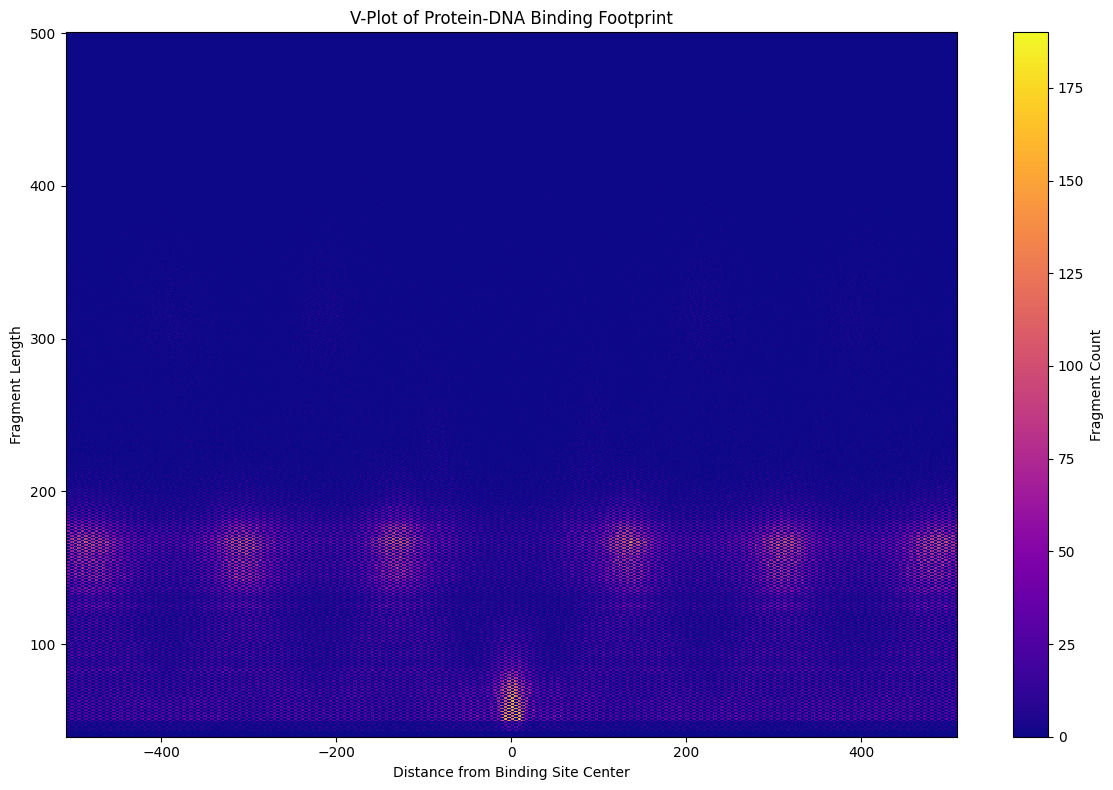

In [16]:
# pivot to a 2D matrix for plotting
heatmap = aggregated.pivot(index='Length', columns='Distance', values='Count').fillna(0)

# extracting matrix and axes
Z = heatmap.values
dx_vals = heatmap.columns.values
length_vals = heatmap.index.values

# plot the V-plot
plt.figure(figsize=(12, 8))
plt.pcolormesh(dx_vals, length_vals[::-1], Z[::-1], cmap='plasma', shading='auto')  # Flip Y-axis visually
plt.colorbar(label='Fragment Count')
plt.xlabel('Distance from Binding Site Center')
plt.ylabel('Fragment Length')
plt.title('V-Plot of Protein-DNA Binding Footprint')
plt.tight_layout()
plt.show()